### Price - Promotion Elasticity Model

4.	The marketing team would like to perform a price-promotion elasticity analysis and has reached out to Bryn’s team to help them build a model that will allow them to gain insight into how much demand changes when the marketing team applies discounts to products’ price. If you are not able to create this model, explain your approach.

In [44]:
%matplotlib inline
#from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [140]:
df = pd.read_excel("Case Study Data.xlsx")
furniture = df.loc[df['Category'] == 'Furniture']

In [20]:
furniture['Price'] = furniture['Sales']/furniture['Quantity']
furniture['PricePromotion'] = furniture['Sales']/furniture['Quantity']*furniture['Discount']
#furniture['Cost'] = furniture['Sales']/furniture['Quantity']

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
furniture['Cost']= furniture['Price']-furniture['Profit']/furniture['Quantity']

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
fur_model = ols("Quantity ~ Price", data=furniture).fit()
print(fur_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.515
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.219
Time:                        12:49:30   Log-Likelihood:                -4729.8
No. Observations:                2121   AIC:                             9464.
Df Residuals:                    2119   BIC:                             9475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7297      0.066     56.190      0.0

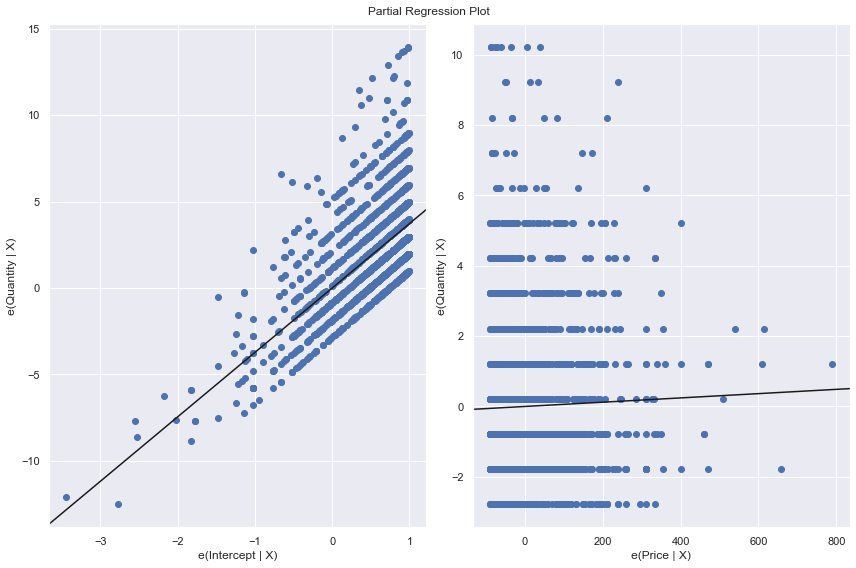

In [27]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(fur_model, fig=fig)

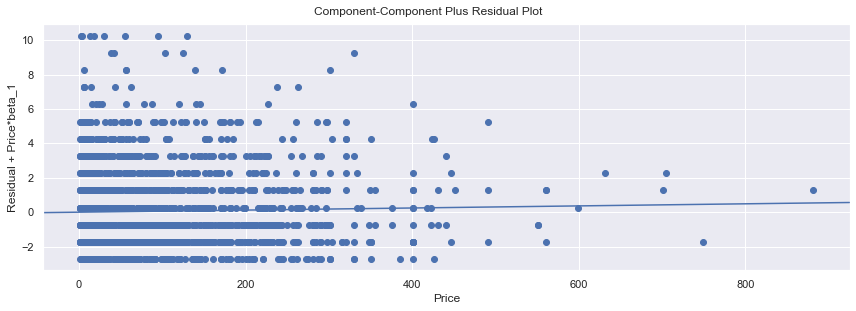

In [28]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(fur_model, fig=fig)

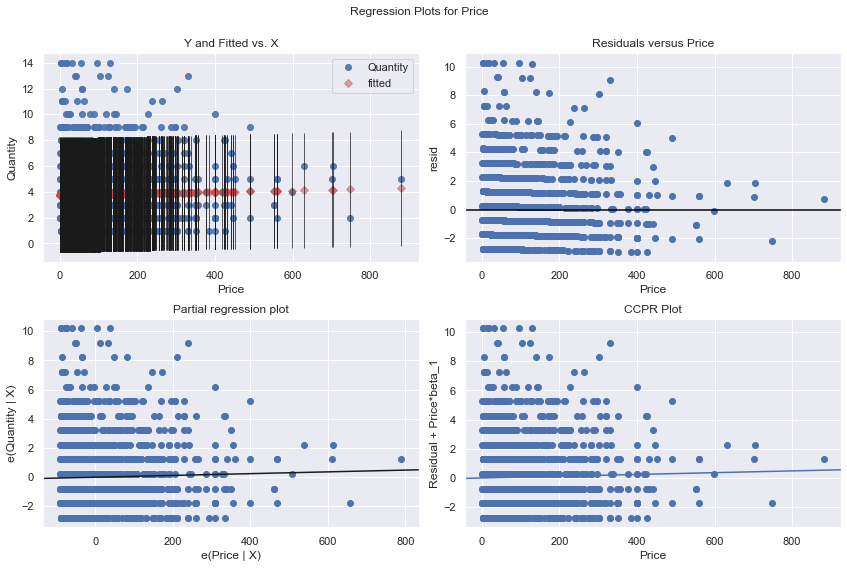

In [30]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fur_model, 'Price', fig=fig)

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [33]:
# Generate sample data
np.random.seed(42)
n_samples = 1000
price = np.random.uniform(5, 50, n_samples)
promotion = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
demand = 100 - 2 * price + 10 * promotion + np.random.normal(0, 5, n_samples)


In [133]:
furniture['Price'] = furniture['Sales']/furniture['Quantity'] 

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
furniture['% Demand'] = furniture['Quantity'].pct_change() 
furniture['% Price'] = furniture['Price'].pct_change()
furniture['Price elasticity'] = furniture['% Demand']/furniture['% Price']

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [139]:
furniture.sort_values(by=['Price elasticity'], ascending=False).head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price,% Demand,% Price,Price elasticity
2700,2701,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",30.768,2,0.2,8.0766,15.384,1.000000,0.000000,inf
5827,5828,CA-2017-161067,2017-09-03,2017-09-06,Second Class,KB-16405,Katrina Bavinger,Home Office,United States,New York City,...,Chairs,Global Low Back Tilter Chair,181.764,2,0.1,-8.0784,90.882,1.000000,0.000892,1121.000000
6131,6132,CA-2014-163447,2014-12-27,2014-12-31,Standard Class,TB-21190,Thomas Brumley,Home Office,United States,New York City,...,Chairs,"Global Push Button Manager's Chair, Indigo",767.214,14,0.1,161.9674,54.801,1.333333,0.002470,539.911111
1953,1954,CA-2017-157987,2017-09-02,2017-09-06,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,...,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,1282.410,5,0.1,213.7350,256.482,4.000000,0.007685,520.503067
4804,4805,CA-2017-136364,2017-07-13,2017-07-17,Second Class,MH-17455,Mark Hamilton,Consumer,United States,Philadelphia,...,Furnishings,Nu-Dell Executive Frame,91.008,9,0.2,19.3392,10.112,2.000000,0.004769,419.333333
5220,5221,CA-2014-140487,2014-06-14,2014-06-20,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Detroit,...,Bookcases,"Hon Metal Bookcases, Gray",212.940,3,0.0,57.4938,70.980,-0.571429,-0.002810,203.371429
3809,3810,CA-2015-113628,2015-11-12,2015-11-19,Standard Class,AH-10690,Anna Häberlin,Corporate,United States,Plantation,...,Chairs,Office Star - Contemporary Task Swivel chair w...,523.920,5,0.2,-72.0390,104.784,4.000000,0.021366,187.211679
3426,3427,CA-2015-153381,2015-09-24,2015-09-28,Standard Class,DE-13255,Deanra Eno,Home Office,United States,Dubuque,...,Chairs,Hon Olson Stacker Stools,1408.100,10,0.0,394.2680,140.810,4.000000,0.036267,110.293831
9493,9494,CA-2016-105207,2016-01-03,2016-01-08,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270,227.550,1.333333,0.013821,96.474533
8304,8305,CA-2017-135419,2017-11-03,2017-11-09,Standard Class,BG-11740,Bruce Geld,Consumer,United States,Bakersfield,...,Tables,"SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...",486.368,4,0.2,36.4776,121.592,0.333333,0.006690,49.828383


In [86]:
furniture['Demand'] = furniture['Quantity'] 

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
furniture['Promotion'] = furniture['Discount']

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
furniture['Promotion'] = np.where(furniture['Promotion'] >0, 1, furniture['Promotion'])

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [91]:
#furniture['Price'] = furniture['Sales']/furniture['Quantity'] 

In [96]:
data = furniture[['Price', 'Promotion', 'Demand']]

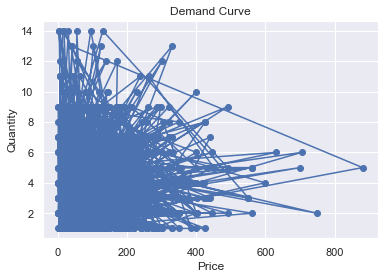

In [94]:
plt.plot(furniture['Price'], furniture['Quantity'], marker='o')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Demand Curve')
plt.grid(True)
plt.show()

In [95]:
# Create a DataFrame
#data = pd.DataFrame({'Price': price, 'Promotion': promotion, 'Demand': demand})
#data

In [97]:
# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [98]:
# Prepare features and target variables
X_train = train_data[['Price', 'Promotion']]
y_train = train_data['Demand']
X_test = test_data[['Price', 'Promotion']]
y_test = test_data['Demand']

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Extract coefficients
price_coef = model.coef_[0]
promotion_coef = model.coef_[1]
intercept = model.intercept_

Mean Squared Error: 5.05275862048601


In [99]:
print(f"Price Coefficient: {price_coef}")
print(f"Promotion Coefficient: {promotion_coef}")
print(f"Intercept: {intercept}")

Price Coefficient: 0.0005755642043971689
Promotion Coefficient: -0.1365470578517912
Intercept: 3.8384013727414317


In [100]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 1.2572150944856197e-05


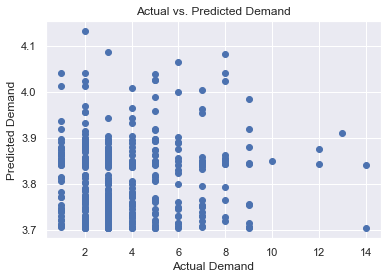

In [101]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs. Predicted Demand")
plt.show()

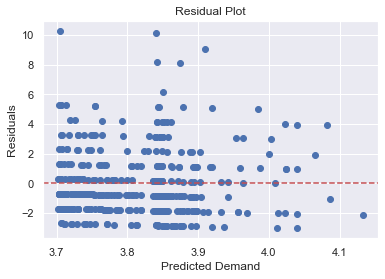

In [102]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Demand")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

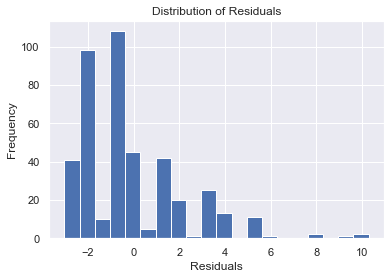

In [103]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [104]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Price,% Demand,% Price,Price elasticity,Demand,Promotion
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,130.9800,NaN,NaN,NaN,2,0.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,243.9800,0.500000,0.862727,0.579558,3,0.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,191.5155,0.666667,-0.215036,-3.100255,5,1.0
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,48.8600,7,0.00,14.1694,6.9800,0.400000,-0.963554,-0.415130,7,0.0
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,1706.1840,9,0.20,85.3092,189.5760,0.285714,26.159885,0.010922,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,383.4656,4,0.32,-67.6704,95.8664,1.000000,-0.299140,-3.342914,4,1.0
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,13.4000,1,0.00,6.4320,13.4000,-0.750000,-0.860222,0.871868,1,0.0
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,85.9800,1,0.00,22.3548,85.9800,0.000000,5.416418,0.000000,1,0.0
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.2480,3,0.20,4.1028,8.4160,2.000000,-0.902117,-2.217008,3,1.0


In [106]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [109]:
df = pd.read_excel("Case Study Data.xlsx")
furniture = df.loc[df['Category'] == 'Furniture']

In [113]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [122]:

# Select relevant columns and create features and target variables
features = furniture[furniture.columns.drop('Sales')]


In [123]:
target = furniture['Sales']

In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [126]:
X_train, X_test, y_train, y_test

(      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
 9326    9327  US-2017-130687 2017-09-07 2017-09-10     First Class   
 7440    7441  US-2017-163657 2017-09-02 2017-09-06  Standard Class   
 3697    3698  CA-2015-151680 2015-11-19 2015-11-21    Second Class   
 7511    7512  US-2017-161935 2017-07-14 2017-07-18  Standard Class   
 4168    4169  CA-2014-157924 2014-10-11 2014-10-13     First Class   
 ...      ...             ...        ...        ...             ...   
 7711    7712  CA-2017-139353 2017-10-28 2017-10-30    Second Class   
 5287    5288  CA-2017-105991 2017-05-05 2017-05-06     First Class   
 5461    5462  CA-2017-101574 2017-09-28 2017-10-04  Standard Class   
 6165    6166  CA-2014-103989 2014-03-19 2014-03-21     First Class   
 4075    4076  CA-2017-108112 2017-11-15 2017-11-20  Standard Class   
 
      Customer ID      Customer Name      Segment        Country          City  \
 9326    PF-19225  Phillip Flathmann     Consumer  United States

In [125]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for testing data
predictions = model.predict(X_test)

ValueError: could not convert string to float: 'US-2017-130687'

In [116]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 256940.90155129804


In [119]:
furniture.Discount.unique()

array([0.  , 0.45, 0.2 , 0.3 , 0.5 , 0.6 , 0.32, 0.1 , 0.15, 0.4 , 0.7 ])